<a href="https://colab.research.google.com/github/SvanaBirgis/Reiknifraedi/blob/main/Skilaverkefni/S6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stærðfræði og reiknifræði vor 2022, skiladæmi 6**

Nafn: Svana Björg Birgisdóttir

Samverkamenn: Hákon Rafn Ingason og Michael Þór Sverrisson

# Verkefni 22 - Málmavinnsla

Í lotukerfinu hefur hvert frumefni sætistölu (atomic number), lotu (period) og flokk (group). Sætistalan gefur fjölda rafeinda (electrons) eða róteinda (protons) í óhlöðnu atómi, lotan segir til um hve mörg hvel (atomic orbitals) af rafeindum óhlaðið atóm hefur, en flokkurinn gefur til kynna fjölda rafeinda á ytri hvelum. Fyrir utan helíum eru 𝐹 rafeindir á ysta hveli í atómum í flokki 𝐹 fyrir 𝐹 = 1,2 og 𝐹 − 10 rafeindir eru þar ef 11 ≤ 𝐹 ≤ 18. Í flokkum 3–10 er fjöldinn 1–2, oftast 2.


1. **Sætistölur eðallofttegunda** Hægt er að reikna sætistölu eðallofttegundar nr. 𝑘, 𝑠𝑘, með eftirfarandi formúlu:


  $sk = \frac{(𝑘+1)(𝑘+2)(𝑘+3)}{6}$ + -2 ef k er oddatala / $\frac{k}{2}-1$ ef k er slétt tala


  Skrifið fall sem reiknar skv. þessari formúlu og prófið það fyrir 𝑘=1,2,...,7. Ath. að allar deilingar ganga upp svo gott er að nota // virkjan svo útkoman verði heiltala.

2. **Lotur og flokkar** Hægt er að ákvarða lotu frumefnis með því að skoða hvar sætistala þess lendir á milli eðallofttegunda. Ef 𝑠 er sætistalan og

  $𝑠𝑘−1<𝑠≤𝑠𝑘$

  þá er frumefnið í lotu 𝑘. Flokkurinn fæst svo með:

  $𝐹 = 1 $              ef s = 1

  $𝐹 = s-sk-1 $         ef 1 < s ≤ sk
  
  $𝐹 = max(3,18+𝑠−𝑠𝑘) $  annars

  Skrifið föll lota(s) og flokkur(s) sem ákvarða lotu og flokk frumefnis með sætistölu 𝑠. Prófið með a.m.k. fjórum frumefnum, þar á meðal einhverjum af sjaldgæfu jarðmálmunum, sem hafa sætistölur á bilinu 57–71 og eru í lotu 6 og flokki 3 skv. lotukerfinu á mynd 22.1. Leiðbeining: Lotuna má finna með while-lykkju og fallinu úr a-lið. Til að finna flokkinn er gott að nota if–elif–else.

3. **Íslensk og ensk málmanöfn.** Með NumPy skipununum í kafla 10.6.4 má lesa skrána https://cs.hi.is/python/allir-malmar.txt inn í vigra efnatákn, nafn, sætistala, eðlisþyngd, bræðslumark og enskt_nafn. Gerið það og búið í framhaldi til uppflettitöflu milli nafnanna með aðstoð dict og zip eins og gert er í sýnidæminu aftast í kafla 8.2 og í verkefni 20c. Náið líka í fallið íslenska úr sama verkefni og notið töfluna og þetta fall til að prenta út orðalista með íslenskum málmanöfnum í stafrófsröð ásamt enskum þýðingum.

4. **Eðlisþyngd eftir sæti.** Teiknið punktarit af sætistölu og eðlisþyngd sem er litað með lotu í lotukerfinu (sbr. verkefni 15 – ath. að Matplotlib getur teiknað hvort sem er lista af tölum eða NumPy vigra). Munið að bæta colorbar við myndirnar.



In [2]:
# a. Sætistölur eðallofttegunda

def sk(k):
  sk = ((k+1)*(k+2)*(k+3))//6
  if k % 2 == 1:
    return sk -2
  else:
    return sk + k//2 -1


for k in range(1,8):
  print(sk(k))



2
10
18
36
54
86
118


In [4]:
# b. Lotur og flokkar


def lota(s):
  k = 0
  while k<8:
    k+=1
    if s > sk(k-1) and s <= sk(k):
      return k


def flokkur(s):
  k = lota(s)
  if s == 1:
    return 1
  elif s > 1 and s <= sk(k-1)+2:
    return s-sk(k-1)
  else:
    return max(3, 18 + s - sk(k))

print(f'Sætistala:  Lota:   Flokkur:')
for k in range(1,71,8):
  print(f'{k:5} {lota(k):9}   {flokkur(k):6}')


Sætistala:  Lota:   Flokkur:
    1         1        1
    9         2       17
   17         3       17
   25         4        7
   33         4       15
   41         5        5
   49         5       13
   57         6        3
   65         6        3


In [ ]:
# c. Íslensk og ensk málmanöfn
import numpy as np

skrá = "https://cs.hi.is/python/allir-malmar.txt"
A = np.loadtxt(skrá, skiprows=1, delimiter=';', dtype='str').T
efnatákn    = A[0].tolist()
nafn        = A[1].tolist()
sætistala   = A[2].astype(int)
A3          = np.char.replace(A[3], ",", ".")
eðlisþyngd  = A3.astype(float)
bræðslumark = A[4].astype(int)
enskt_nafn  = A[5].tolist()

tafla = dict(zip(nafn, enskt_nafn))

def íslenska(s):
    """notað sem 'key' í sort eða sorted til að raða í íslenska stafrófsröð,
    t.d. print(sorted(['ár','bára','bali','akur'], key=íslenska))"""
    return [íslenska.k.get(c.lower(),0) for c in s]
    return t
íslenska.a = list('0123456789aábcdðeéfghiíjklmnoópqrstuúvwxyýzþæö')
íslenska.k = dict(zip(íslenska.a, range(1,len(íslenska.a)+1)))


abc = sorted(tafla,key=íslenska)
alltabc = []
for i in abc:
  alltabc.append((i,tafla[i]))

for i in range(len(abc)):
  if i % 5 == 0 and i != 0:
    print("\n")
  print(alltabc[i], end=" ")



('aktín', 'Actinium') ('ál', 'Aluminum') ('barín', 'Barium') ('beryllín', 'Beryllium') ('bismút', 'Bismuth') 

('blý', 'Lead') ('dysprósín', 'Dysprosium') ('erbín', 'Erbium') ('evrópín', 'Europium') ('fransín', 'Francium') 

('gadólín', 'Gadolinium') ('gallín', 'Gallium') ('gull', 'Gold') ('hafnín', 'Hafnium') ('hólmín', 'Holmium') 

('indín', 'Indium') ('iridín', 'Iridium') ('járn', 'Iron') ('kadmín', 'Cadmium') ('kalín', 'Potassium') 

('kalsín', 'Calcium') ('kopar', 'Copper') ('kóbalt', 'Cobalt') ('króm', 'Chromium') ('kvikasilfur', 'Mercury') 

('lantan', 'Lanthanum') ('litín', 'Lithium') ('lútetín', 'Lutetium') ('magnesín', 'Magnesium') ('mangan', 'Manganese') 

('mólýbden', 'Molybdenum') ('natrín', 'Sodium') ('neódým', 'Neodymium') ('neptún', 'Neptunium') ('nikkel', 'Nickel') 

('níóbín', 'Niobium') ('osmín', 'Osmium') ('palladín', 'Palladium') ('platína', 'Platinum') ('plúton', 'Plutonium') 

('pólon', 'Polonium') ('praseódým', 'Praseodymium') ('prometín', 'Promethium') ('prótak

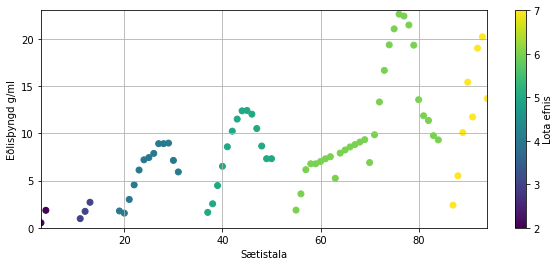

In [ ]:
# d. Eðlisþyngd eftir sæti
import matplotlib.pyplot as plt

lota_efnis = []
for x in sætistala:
  lota_efnis.append(lota(x))

plt.figure(figsize=(10,4))
plt.xlim(3, 94)
plt.ylim(0,23)
plt.scatter(sætistala,eðlisþyngd, c=lota_efnis)
plt.colorbar(label='Lota efnis')
plt.xlabel('Sætistala')
plt.ylabel('Eðlisþyngd g/ml')
plt.grid()



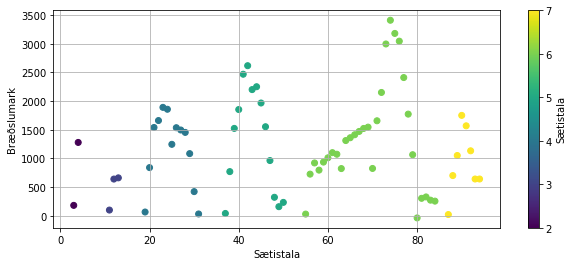

In [ ]:
# d. Eðlisþyngd eftir sæti
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.scatter(sætistala,bræðslumark, c=lota_efnis)
plt.colorbar(label='Sætistala')
plt.xlabel('Sætistala')
plt.ylabel('Bræðslumark')
plt.grid()


# Verkefni 26 - Körfuboltamenn

Skráin cs.hi.is/python/karfa.txt inniheldur þrjá dálka með aldri hæð og þyngd 1064 bandarískra körfuboltamanna. Notið np.loadtxt til að lesa skrána inn í þrjá vigra t.d. aldur, hæð og þyngd eða a, h og þ. Eftirfarandi teikningar þarf að gera sæmilega snyrtilega, m.a. merkja ása og setja inn titla og passa að þær séu mátulega stórar. Þeir sem vilja mega setja einhverjar teikningar hlið við hlið með því að nota plt.subplot, sbr. einfalda lýsingu hér.

1. Teiknið þrjú (einföld) súlurit af aldri, hæð og þyngd.

2. Teiknið punktarit með hæð á x-ás og þyngd á y-ás. Finnið svo og teiknið jöfnu bestu línu inn á myndina (sbr. verkefni 24)

3. Miðtölu (median) vigurs x má finna með np.median(x) (helmingur staka x er minni en miðtalan og helmingur stærri). Hver er miðtala aldurs körfuboltamannanna. Notið miðtöluna til að skipta gögnunum í tvennt (með rökvísun), yngri og eldri. Finnið meðalhæð þeirra yngri og þeirra eldri.

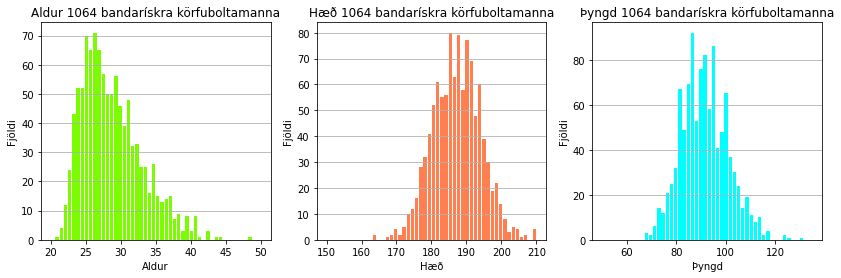

In [ ]:
# a. Einföld súlurit


aldur,hæð,þyngd = np.loadtxt('https://cs.hi.is/python/karfa.txt').T


plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.hist(aldur, bins = 50, range=(20, 50), color='lawngreen', rwidth=0.8)
plt.grid(axis='y')
plt.xlabel('Aldur')
plt.ylabel('Fjöldi')
plt.title('Aldur 1064 bandarískra körfuboltamanna')


plt.subplot(1,3,2)
plt.hist(hæð, bins = 50, range=(150, 210), color='coral', rwidth=0.8)
plt.grid(axis='y')
plt.xlabel('Hæð')
plt.ylabel('Fjöldi')
plt.title('Hæð 1064 bandarískra körfuboltamanna')

plt.subplot(1,3,3)
plt.hist(þyngd, bins = 50, range=(50, 135), color='cyan', rwidth=0.8)
plt.grid(axis='y')
plt.xlabel('Þyngd')
plt.ylabel('Fjöldi')
plt.title('Þyngd 1064 bandarískra körfuboltamanna')
plt.show()

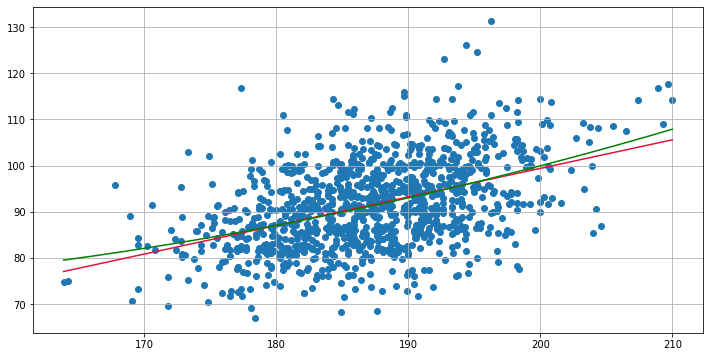

In [ ]:
# b. Punktarit og besta lína

plt.figure(figsize=(12,6))
(a,b) = np.polyfit(hæð, þyngd, deg=1)
(A,B,C) = np.polyfit(hæð, þyngd, deg=2)
xp = np.linspace(min(hæð), max(hæð))
#xp = np.linspace(60, 135)
yp = a*xp + b
ypara = A*xp**2+B*xp+C
plt.plot(xp,yp, color='crimson')
plt.plot(xp,ypara,color='green')
plt.scatter(hæð, þyngd)
plt.grid()


In [ ]:
# c. Miðtala

med_age = np.median(aldur)

yngri = np.array([xi for xi in aldur if xi < med_age])
eldri = np.array([xi for xi in aldur if xi > med_age])

yngri_height = hæð[(yngri).astype(int)]
eldri_height = hæð[(eldri).astype(int)]

yngri_med_height = sum(yngri_height)/len(yngri_height)
eldri_med_height = sum(eldri_height)/len(eldri_height)

print(f'Miðtala aldurs: {med_age}')
print(f'Meðalhæð yngri: {yngri_med_height:.2f}')
print(f'Meðalhæð eldri: {eldri_med_height:.2f}')



Miðtala aldurs: 27.979999999999997
Meðalhæð yngri: 189.45
Meðalhæð eldri: 187.94


# Verkefni 27 - Kínverskt jöfnuhneppi

Hér er dæmi úr gömlu kínversku handriti frá því á fyrstu öld f.Kr. Leysið það með NumPy:

Nokkrir ætla að leggja í púkk til að kaupa hlut. Ef hver borgar átta peninga eru þrír peningar afgangs en ef hver borgar sjö vantar fjóra upp á. Hve margir eru kaupendur og hvað kostar hluturinn?

In [ ]:
import numpy as np, numpy.linalg as la
A = np.array([[8,-1],
              [7,-1]])
b = np.array([3, -4])
x = la.solve(A, b)
print(x)



[ 7. 53.]
